<img src='../logo2.png'>

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

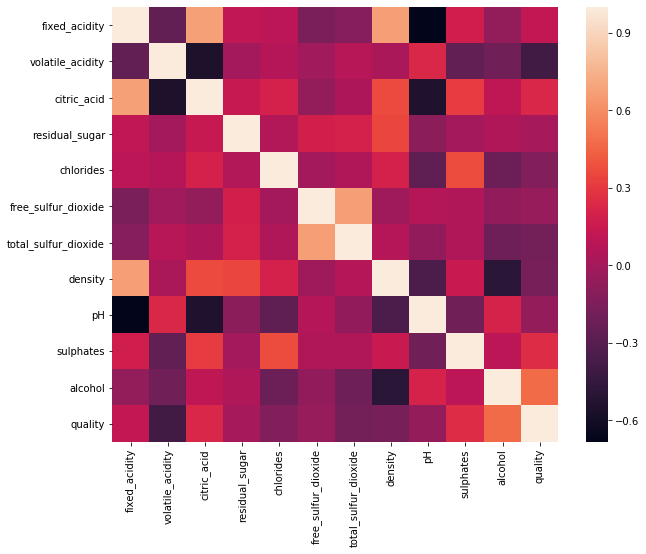

In [16]:
corr = data.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr)
plt.show()

In [9]:
corr['quality'].sort_values(ascending=False).head(4)

quality        1.000000
alcohol        0.476166
sulphates      0.251397
citric_acid    0.226373
Name: quality, dtype: float64

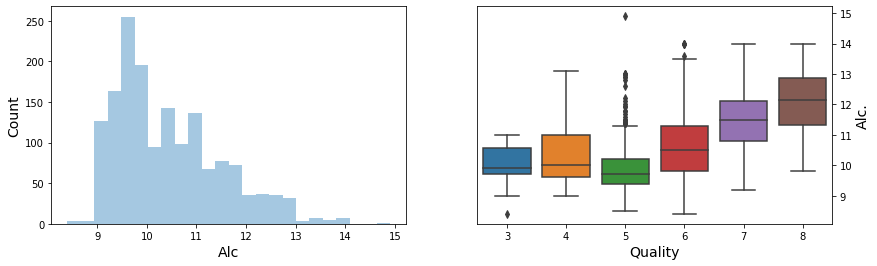

In [10]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['alcohol'], ax = axes[0], kde=False)
axes[0].set_xlabel('Alc', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = data['quality'], y = data['alcohol'], ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Alc.', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

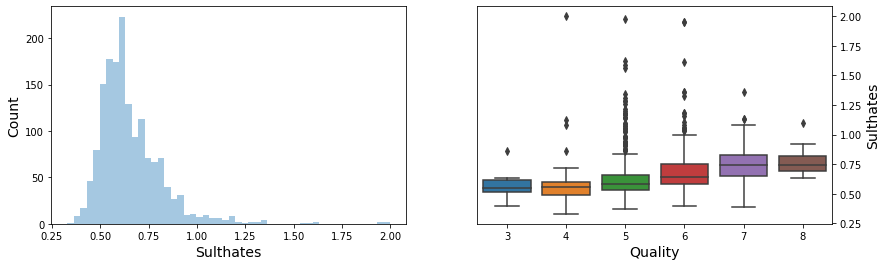

In [11]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['sulphates'], ax = axes[0], kde=False)
axes[0].set_xlabel('Sulthates', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = data['quality'], y = data['sulphates'], ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Sulthates', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

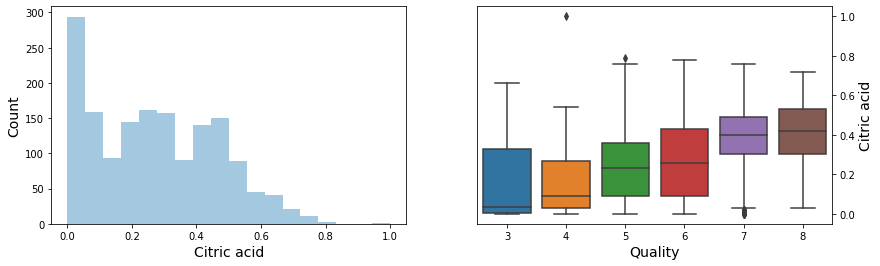

In [12]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['citric_acid'], ax = axes[0], kde=False)
axes[0].set_xlabel('Citric acid', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = data['quality'], y = data['citric_acid'], ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Citric acid', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()


plt.show()

In [3]:
X, y = data.drop(columns=['quality']), data['quality'] 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=96)

In [5]:
X_test.shape, y_test.shape

((640, 11), (640,))

In [6]:
X_train.shape, y_train.shape

((959, 11), (959,))

### Models

In [7]:
tree = DecisionTreeClassifier(random_state=96)

In [8]:
np.mean(cross_val_score(tree, X_train, y_train, cv=5))

0.603746727748691

In [9]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=96, splitter='best')

In [14]:
print(classification_report(tree.predict(X_test), y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.08      0.09      0.09        23
           5       0.62      0.60      0.61       282
           6       0.52      0.55      0.53       240
           7       0.40      0.37      0.38        79
           8       0.11      0.12      0.12         8

    accuracy                           0.52       640
   macro avg       0.29      0.29      0.29       640
weighted avg       0.52      0.52      0.52       640



In [10]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
np.mean(cross_val_score(knn, X_train, y_train, cv =5))

0.49527159685863875

In [17]:
print(classification_report(knn.predict(X_test), y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.65      0.54      0.59       333
           6       0.45      0.45      0.45       256
           7       0.19      0.29      0.23        49
           8       0.00      0.00      0.00         1

    accuracy                           0.48       640
   macro avg       0.22      0.21      0.21       640
weighted avg       0.53      0.48      0.50       640



/home/maverick/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
vec = SVC(gamma='scale')

In [23]:
np.mean(cross_val_score(vec, X_train, y_train, cv =5))

0.5057046247818499

In [24]:
vec.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
print(classification_report(vec.predict(X_test), y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.43      0.60      0.50       196
           6       0.75      0.43      0.55       443
           7       0.01      1.00      0.03         1
           8       0.00      0.00      0.00         0

    accuracy                           0.49       640
   macro avg       0.20      0.34      0.18       640
weighted avg       0.65      0.49      0.53       640



/home/maverick/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
forest = RandomForestClassifier(random_state=96, n_estimators=100)

In [20]:
np.mean(cross_val_score(forest, X_train, y_train, cv=5))

0.6694153577661431

In [21]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=96, verbose=0,
                       warm_start=False)

In [26]:
print(classification_report(forest.predict(X_test), y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.78      0.71      0.74       302
           6       0.64      0.59      0.61       282
           7       0.38      0.50      0.43        54
           8       0.00      0.00      0.00         2

    accuracy                           0.63       640
   macro avg       0.30      0.30      0.30       640
weighted avg       0.68      0.63      0.66       640



/home/maverick/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tuning down here

#### tree

In [25]:
tree_params = {'max_depth':range(1, 10), 'max_features': [.5, .7, 1]} 

In [26]:
tree_mod = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1)

In [64]:
%%time
tree_mod.fit(X_train, y_train)

CPU times: user 207 ms, sys: 40.7 ms, total: 248 ms
Wall time: 1.64 s


/home/maverick/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=96,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': [0.5, 0.7, 1]},
             pre_dispatch='2*n_

In [28]:
tree_mod.best_score_, tree_mod.best_params_

(0.6058394160583942, {'max_depth': 6, 'max_features': 0.5})

#### kNN

In [29]:
knn_params={'n_neighbors':[5, 15, 30]}

In [30]:
knn_mod = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1)

In [31]:
%%time
knn_mod.fit(X_train, y_train)

CPU times: user 49.4 ms, sys: 607 µs, total: 50 ms
Wall time: 216 ms


/home/maverick/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1, param_grid={'n_neighbors': [5, 15, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
knn_mod.best_score_, knn_mod.best_params_

(0.5224191866527633, {'n_neighbors': 15})

#### forest

In [27]:
forest_params = {'n_estimators':[20, 50, 100, 200, 400], 'max_depth':[4, 6, 8, 10], 'max_features': [.5, .7, 1]}

In [28]:
forest_mod = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1)

In [29]:
%%time
forest_mod.fit(X_train, y_train)

CPU times: user 1.99 s, sys: 70.5 ms, total: 2.06 s
Wall time: 41.8 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=96,
                                  

In [30]:
forest_mod.best_score_

0.6746291448516579

In [37]:
forest_prediction = forest_mod.predict(X_test)

In [38]:
test_wine_data = X_test.copy()

In [39]:
test_wine_data['quality'] = forest_prediction

In [40]:
test_wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1346,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4,6
1425,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,6
242,7.7,0.580,0.10,1.8,0.102,28.0,109.0,0.99565,3.08,0.49,9.8,5
519,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5
1277,7.0,0.690,0.00,1.9,0.114,3.0,10.0,0.99636,3.35,0.60,9.7,5


In [41]:
test_wine_data['quality'].value_counts()

5    304
6    279
7     56
8      1
Name: quality, dtype: int64

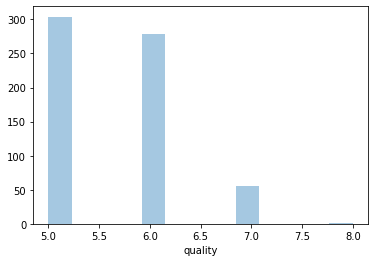

In [42]:
sns.distplot(test_wine_data['quality'], kde=False);

In [57]:
params_six = test_wine_data[test_wine_data['quality'] == 6].agg(np.mean)
params_seven = test_wine_data[test_wine_data['quality'] == 7].agg(np.mean)
params_five = test_wine_data[test_wine_data['quality'] == 5].agg(np.mean)

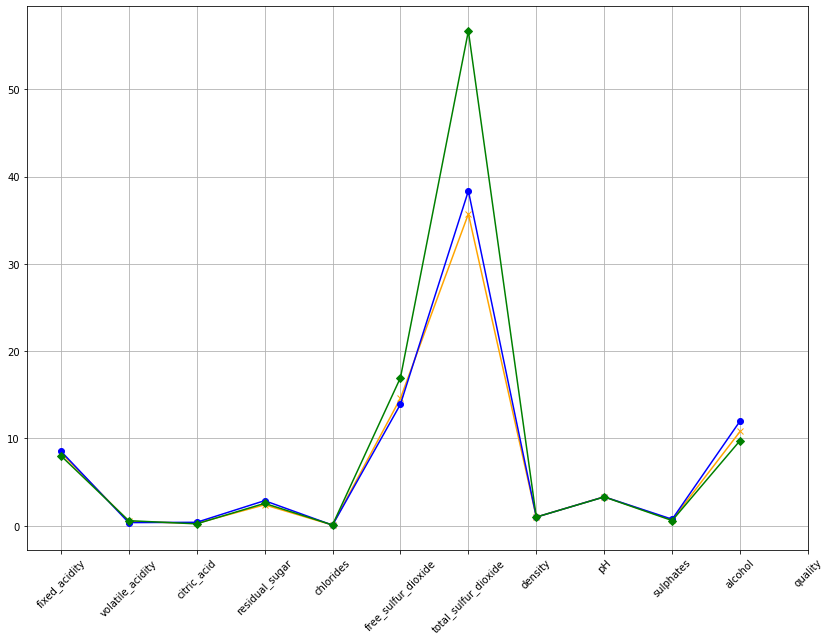

In [59]:
plt.figure(figsize=(14, 10))
plt.plot(test_wine_data.columns[:-1], params_six[:-1], marker='x', color='orange')
plt.plot(test_wine_data.columns[:-1], params_seven[:-1], marker='o', color='blue')
plt.plot(test_wine_data.columns[:-1], params_five[:-1], marker='D', color='green')
plt.grid()
plt.xticks(test_wine_data.columns, rotation=45);

In [70]:
export_graphviz(tree, feature_names=X.columns, filled=True, out_file='tree_viz.dot')

In [71]:
! dot -Tpng 'tree_viz.dot' -o 'tree_viz.png'

<img src='tree_viz.png'>